<a href="https://colab.research.google.com/github/dushyantmaharshi/Bike-Sharing-Demand-Prediction-Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Basic Data Exploration**

In [3]:
# Importing the csv
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
df.shape

(8760, 14)

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
df.describe(include = 'all', percentiles = [.25,.50,.75,.80,.85,.90,.95])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# duplicate
len(df[df.duplicated()])

0

# **Overview Of Data**
* There are 8760 rows and 14 features in our dataset
* No null values are there
* There are 4 categorical features and 10 numerical features
* Dependent Variable - 'Rented Bike Count'

# **Exploratory Data Analysis**

# *Feature Engineering*

Exploring the date column 

In [10]:
import datetime

In [11]:
# Date columns to Date format conversion
df['Date']= pd.to_datetime(df['Date'])

In [12]:
# Let's check how many years data is taken
years_in_data = pd.to_datetime(df['Date']).dt.year.unique()
months_in_data = pd.to_datetime(df['Date']).dt.month.nunique()
print(f'{months_in_data} months data for year {years_in_data}  is captured in the given dataset.')

12 months data for year [2017 2018]  is captured in the given dataset.


Date variable contains information of - day,month and year for a given data. 

 'Month' and 'Day' information we can use to look for a trend of bike booking. Let us implement this.

In [13]:
# Extracting day,month, day of week and weekdays/weekend from date column
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date'],axis=1)

Converted the date feature in month, day and weekends to see the trends 

In [14]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_of_week,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


## **Outlier Detection**

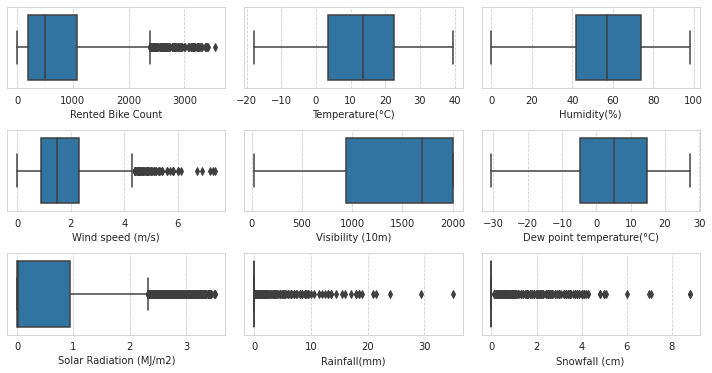

In [15]:
fig = plt.subplots(figsize=(10,10))
for i,j in enumerate(['Rented Bike Count','Temperature(°C)','Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']):
    plt.subplot(6,3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

There are 5 variables where outliers are present - Rented Bike Count, Rainfall, Snowfall,Solar Radiation and windspeed. One should note that all four out of five variables are seasonal event. Let us check whether their max and minimum values seems superficial.

In [16]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


It is evident from boxplot and above description that, since the outliers are in only seasonal events and their max and min numbers are not superficial, we can consider these outliers as allowable.

## *Hourly Basis Bike Sharing Demand*

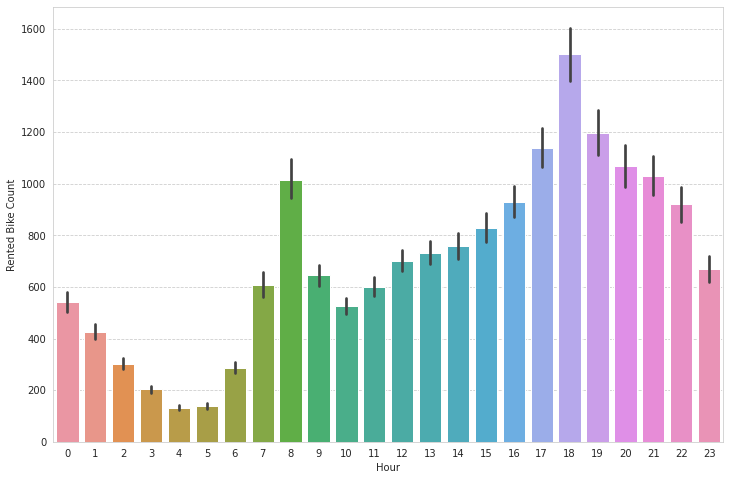

In [17]:
# Displaying Hourly basis Bike Demand
plt.figure(figsize = (12,8))
sns.barplot(x='Hour', y='Rented Bike Count', data = df)

[Text(0.5, 1.0, 'Rented Bike Count During different Seasons')]

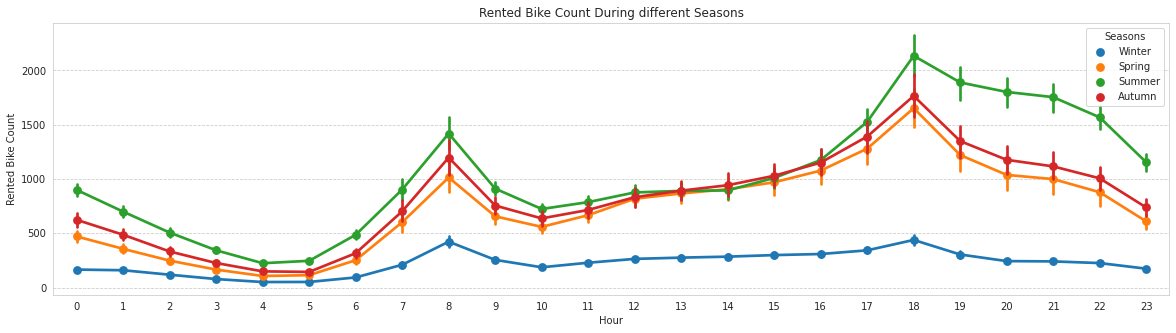

In [18]:
# Displaying Hourly basis Bike Demand in different seasons
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Rented Bike Count During different Seasons')

Seasonal Demand Trends -

* Peak demand is usually at 6 PM and the demand increases between 5 PM to 7 PM.
* Minimum demand is observed between 3 AM to 4 AM.
* We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand


## *Monthly Bike Sharing Demand*

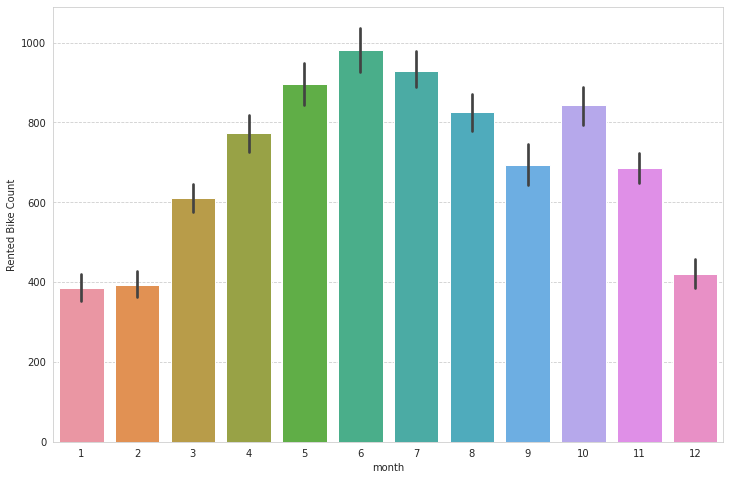

In [19]:
#Create the plot
plt.figure(figsize = (12,8))
sns.barplot(x='month', y='Rented Bike Count', data = df)

## *Seasonal Rented Bike Count*

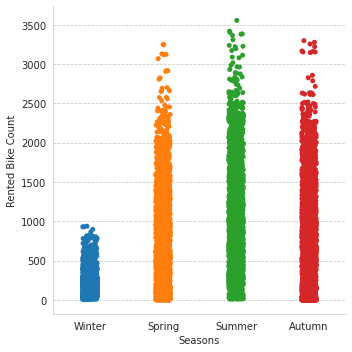

In [20]:
#Create the plot
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

# *Affect of Weekday and Weekend*

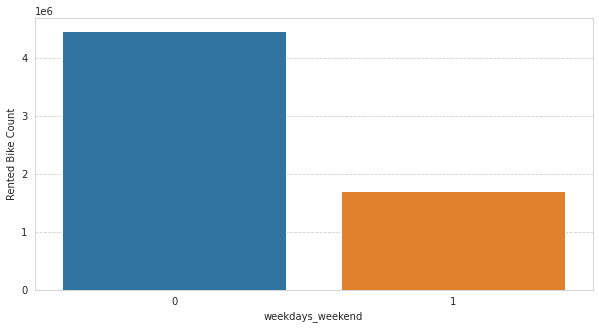

In [21]:
# Creating the PLot
weekend_affect = df.groupby('weekdays_weekend', as_index = False)['Rented Bike Count'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x= 'weekdays_weekend' , y='Rented Bike Count', data= weekend_affect)

## *Effect of Temperature On Rented Bike Count*

Text(0.5, 1.0, 'Rented bike count with respect to TEMPERATURE')

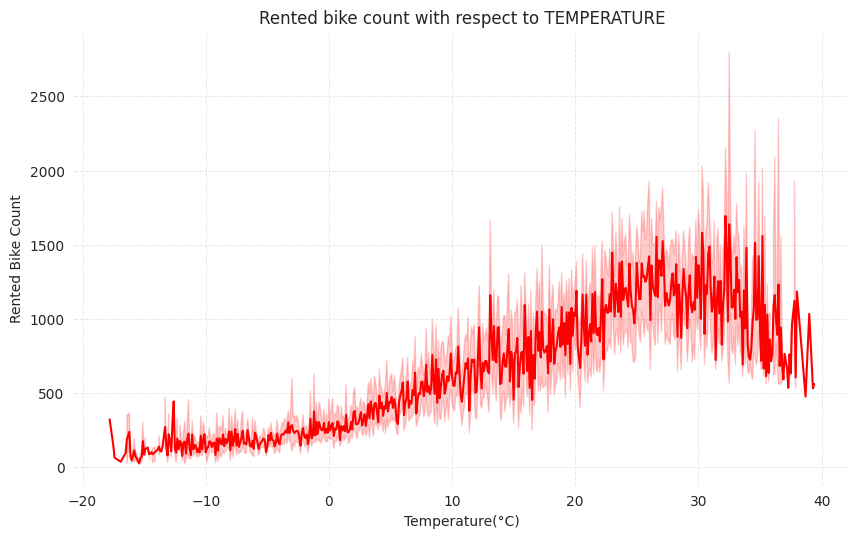

In [22]:
# Let's plot a line plot to display the temperature 
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Temperature(°C)", y="Rented Bike Count", 
             color='red')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title('Rented bike count with respect to TEMPERATURE')

# **Numerical Features**

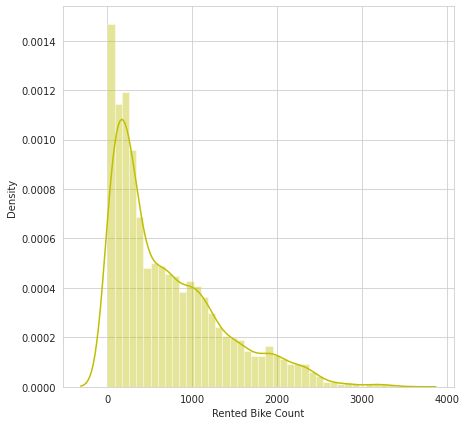

In [23]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="y")

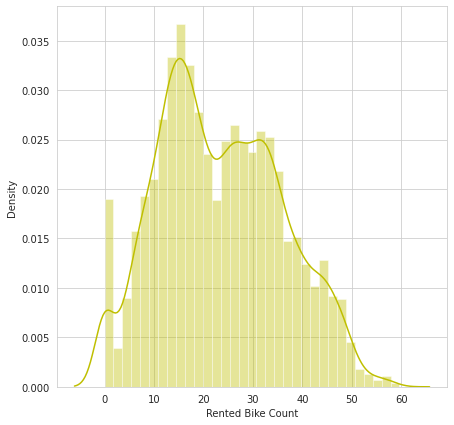

In [24]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="y")

In [25]:
# Extracting the numerical features
numeric_features = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

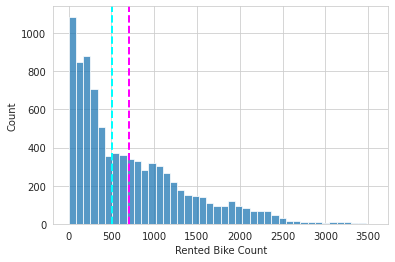

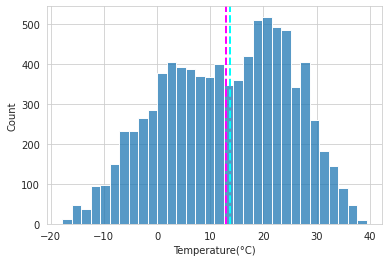

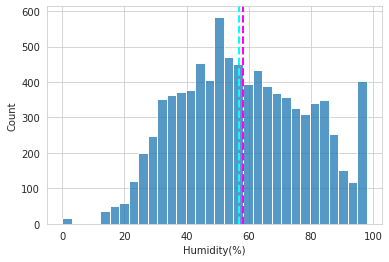

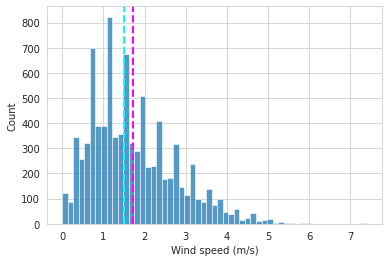

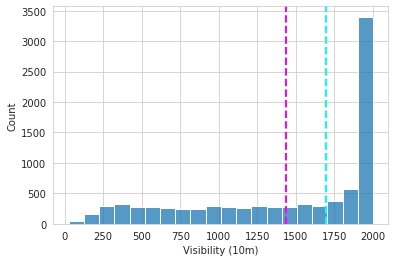

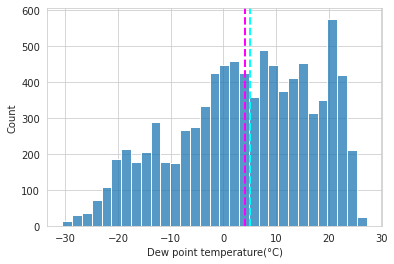

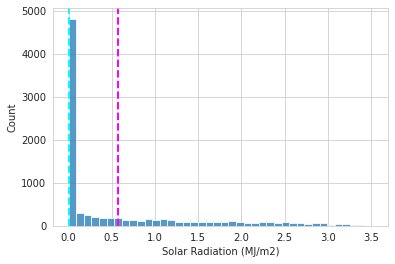

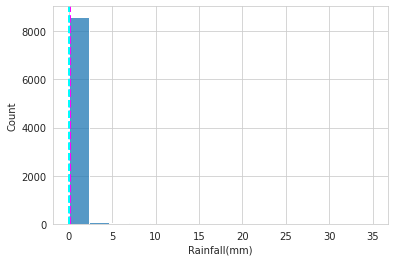

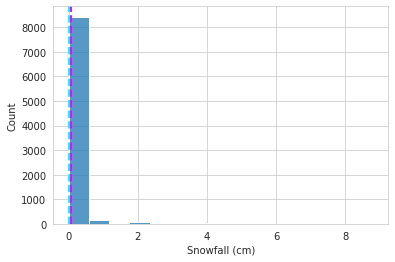

In [26]:
#plotting histogram
for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

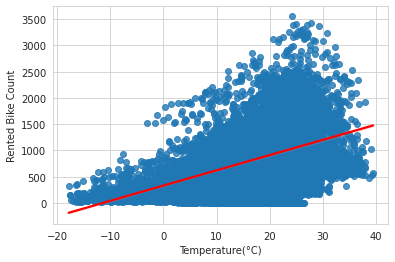

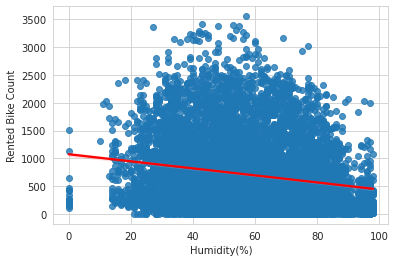

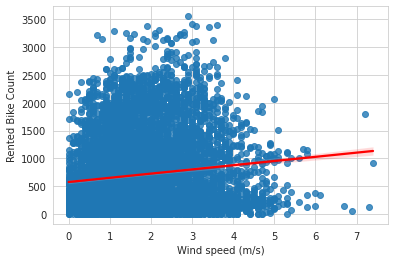

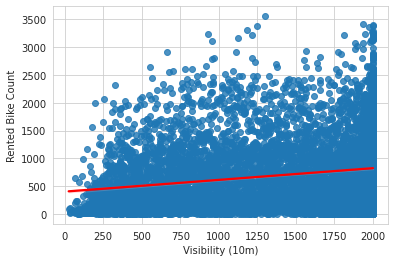

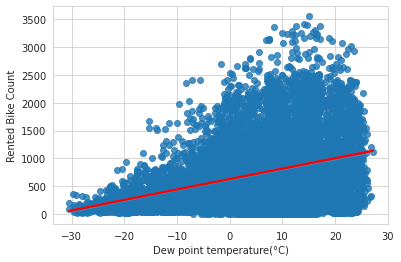

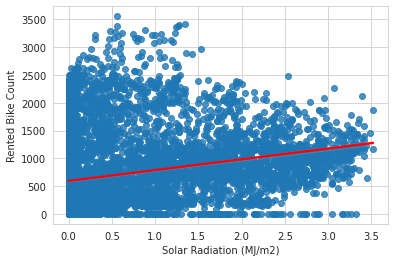

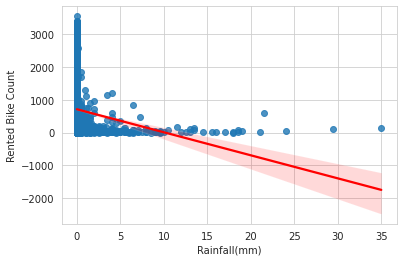

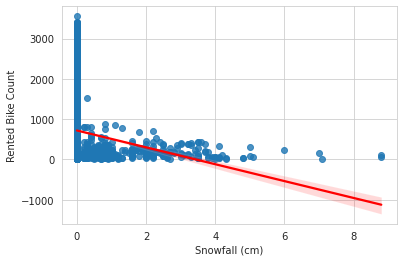

In [27]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

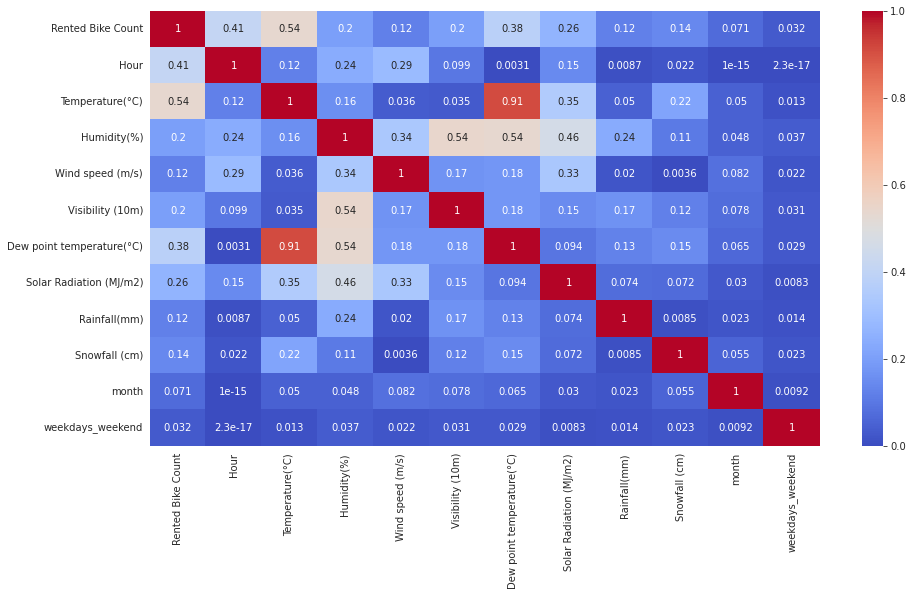

In [28]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [29]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour','month','weekdays_weekend'] ]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


# Categorical Features

In [31]:
df['Hour'] = df['Hour'].astype(object)
df['month'] = df['month'].astype(object)   
df['weekdays_weekend'] = df['weekdays_weekend'].astype(object)

In [32]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [33]:
categorical_features

,Hour,Seasons,Holiday,Functioning Day,month,day_of_week,weekdays_weekend
0,0,Winter,No Holiday,Yes,1,Thursday,0
1,1,Winter,No Holiday,Yes,1,Thursday,0
2,2,Winter,No Holiday,Yes,1,Thursday,0
3,3,Winter,No Holiday,Yes,1,Thursday,0
4,4,Winter,No Holiday,Yes,1,Thursday,0
...,...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,11,Friday,0
8756,20,Autumn,No Holiday,Yes,11,Friday,0
8757,21,Autumn,No Holiday,Yes,11,Friday,0
8758,22,Autumn,No Holiday,Yes,11,Friday,0


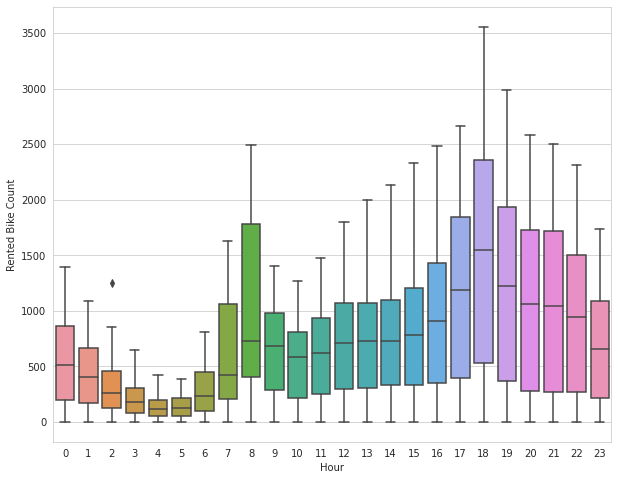

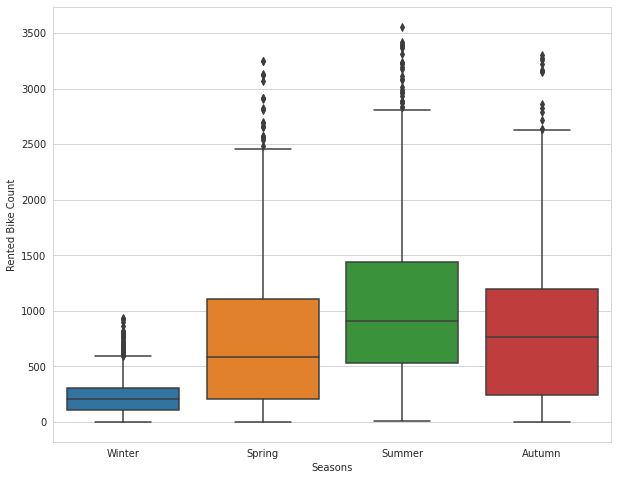

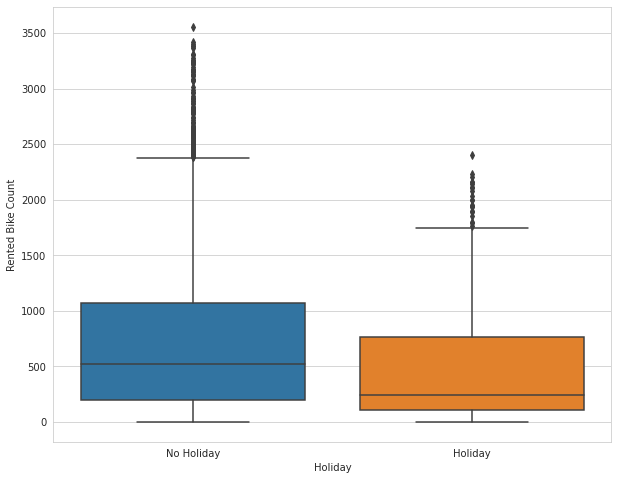

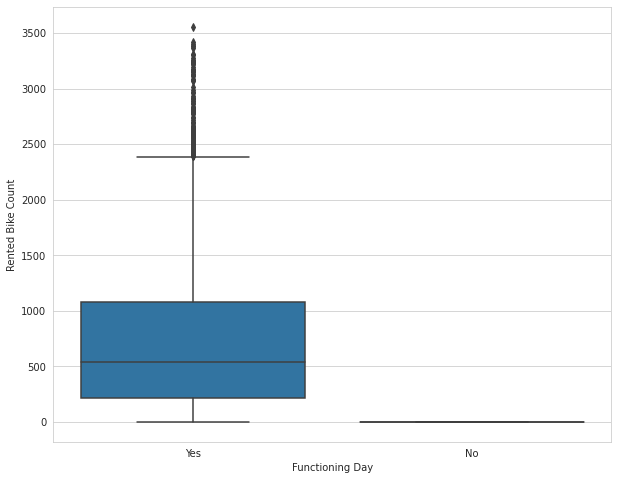

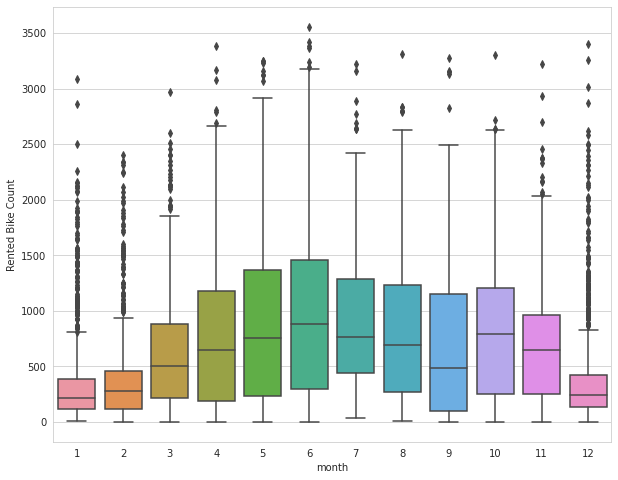

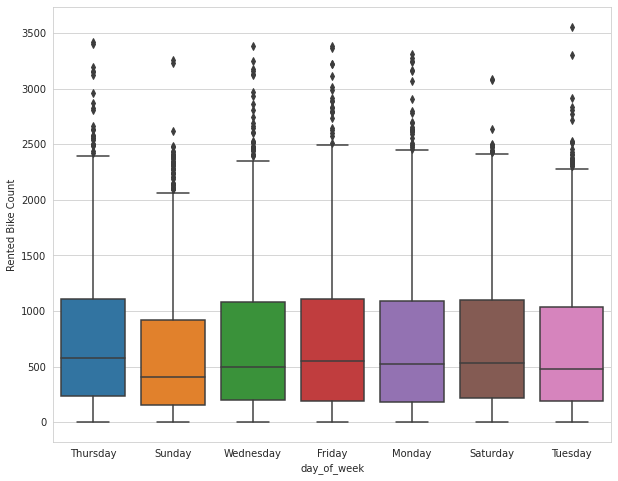

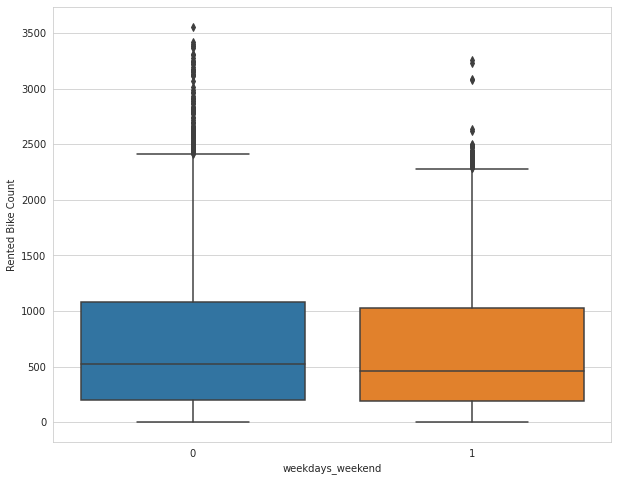

In [34]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

In [35]:
numeric_features = df[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]

In [36]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [37]:
dummy_categorical_feature

,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,...,month_10,month_11,month_12,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weekdays_weekend_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8756,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8757,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8758,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
#concating numeric columns and dummy columns and creating final df
new_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [39]:
new_df

,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,...,weekdays_weekend_1,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,0,0,0,0,0,0,0,0,0,...,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,0,0,0,1,0,0,0,0,0,0,...,0,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,0,0,0,0,0,0,0,...,0,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,0,0,0,0,0,0,0,0,0,0,...,0,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,0,0,0,0,0,0,0,0,0,0,...,0,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,0,0,0,0,0,0,0,0,0,0,...,0,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


# **Train Test Split**

In [40]:
# Extracting X and y values 
X= new_df.drop(['Rented Bike Count'],axis=1)
y=np.sqrt(new_df['Rented Bike Count'])

In [41]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25 , random_state = 3)
print(X_train.shape)
print(X_test.shape)

(6570, 54)
(2190, 54)


In [42]:
X_train.head()

,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,...,day_of_week_Wednesday,weekdays_weekend_1,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
1166,0,0,0,0,0,0,0,0,0,0,...,0,0,4.4,42,2.3,719,-7.4,0.72,0.0,0.0
7347,0,0,1,0,0,0,0,0,0,0,...,0,1,12.6,78,0.6,1907,8.8,0.00,0.0,0.0
5225,0,0,0,0,0,0,0,0,0,0,...,0,0,26.6,52,2.2,2000,15.9,1.02,0.0,0.0
7795,0,0,0,0,0,0,0,0,0,0,...,0,1,14.9,46,1.4,1455,3.3,0.00,0.0,0.0
2795,0,0,0,0,0,0,0,0,0,0,...,0,0,15.8,40,1.9,647,2.2,1.95,0.0,0.0


In [43]:
X_test.head()

,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,...,day_of_week_Wednesday,weekdays_weekend_1,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
2658,0,0,0,0,0,0,0,0,0,0,...,1,0,2.0,77,1.3,2000,-1.6,0.07,0.0,0.0
2870,0,0,0,0,0,0,0,0,0,0,...,0,0,21.0,28,2.8,1191,1.7,2.75,0.0,0.0
3876,0,0,0,0,0,0,0,0,0,0,...,0,0,20.0,47,1.4,685,8.3,3.08,0.0,0.0
4010,0,1,0,0,0,0,0,0,0,0,...,0,0,21.8,97,1.3,175,21.2,0.00,1.0,0.0
6163,0,0,0,0,0,0,0,0,0,0,...,0,0,32.7,56,2.2,2000,22.7,0.33,0.0,0.0


# **Scaling the Data**

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Creating a function for calculate score**

In [45]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [53]:
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,mean_absolute_error

In [54]:
def score_metrics(actual,predicted):
  #finding mean_squared_error
  MSE  = mean_squared_error(y_test, predicted)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(mean_squared_error(y_test, predicted))
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test, predicted)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

In [47]:
def evaluation_graph(actual,predicted):
  plt.figure(figsize=(20,10))
  plt.plot((predicted)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

# **Linear Regression**

In [48]:
# Importing linear model and fitting to the data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [49]:
reg.score(X_train, y_train)

0.7639551406514451

In [50]:
reg.coef_

array([-2.20106544e+00, -5.07514959e+00, -7.53113757e+00, -9.59087437e+00,
       -9.19848859e+00, -4.47800020e+00,  1.84469399e+00,  7.50806452e+00,
        6.38399137e-01, -3.65277011e+00, -3.50903444e+00, -3.04329466e+00,
       -3.14292271e+00, -2.97293360e+00, -1.76956980e+00,  3.20943373e-01,
        4.02279352e+00,  1.01597345e+01,  7.27827866e+00,  6.56854759e+00,
        5.97036916e+00,  5.48725792e+00,  1.44325380e+00, -3.11335662e+00,
       -3.60526162e+00, -6.82660666e+00,  2.89573252e+00,  2.84685666e+01,
       -6.22798627e-01,  2.83618501e-01,  8.06517787e-01,  1.79424100e+00,
        3.98019772e+00, -2.32562891e-01, -7.75424458e-01,  1.01968144e-01,
        2.09123385e+00,  9.15894553e-01,  1.14786078e+00, -2.32451086e-01,
        1.35788259e-01, -6.71557316e-01, -2.96629084e-02, -4.33595414e-01,
        2.41803299e-01, -5.35769057e-01,  4.44747044e-02, -2.51211642e-01,
       -1.71702655e-01,  4.14844539e-04,  4.55250292e-01,  1.21267585e+00,
       -1.55343691e+00,  

In [51]:
y_pred_linear = reg.predict(X_test)

In [55]:
score_metrics(y_test, y_pred_linear)

MSE : 38.67745375427077
RMSE : 6.219120014461112
R2 : 0.7523683581926031
Adjusted R2 :  0.7461050754489968


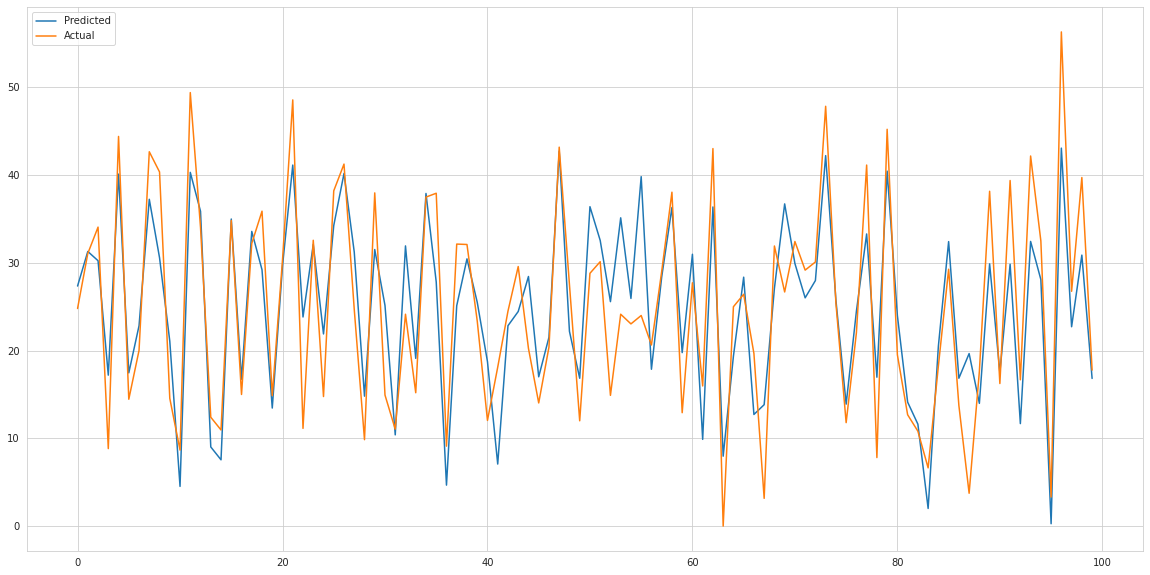

In [56]:
# Evaluation Graph
evaluation_graph(y_test,y_pred_linear)

# **Regularization**

# *Lasso Regression*

In [57]:
# Importing and fitting the model
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [58]:
lasso.score(X_train, y_train)

0.7639550382541987

In [59]:
lasso.coef_

array([-2.19601312e+00, -5.07017667e+00, -7.52600551e+00, -9.58564877e+00,
       -9.19308175e+00, -4.47270125e+00,  1.84557989e+00,  7.50995269e+00,
        6.41611970e-01, -3.64340783e+00, -3.49841818e+00, -3.03223218e+00,
       -3.13173412e+00, -2.96245668e+00, -1.76003667e+00,  3.24166048e-01,
        4.02453435e+00,  1.01600628e+01,  7.27787553e+00,  6.56767653e+00,
        5.96996398e+00,  5.48691271e+00,  1.44316696e+00, -3.10982730e+00,
       -3.60397979e+00, -6.82606520e+00,  2.89379513e+00,  2.84633800e+01,
       -6.27634122e-01,  2.74745832e-01,  7.97748141e-01,  1.78541076e+00,
        3.97252305e+00, -2.37958222e-01, -7.81320986e-01,  9.34335550e-02,
        2.08423860e+00,  9.08980080e-01,  1.14093143e+00, -2.29959451e-01,
        0.00000000e+00, -8.07054784e-01, -2.70206438e-02, -4.31264271e-01,
        2.42973211e-01, -3.97814452e-01,  4.47612038e-02, -2.51194532e-01,
       -1.71207660e-01,  4.15189140e-04,  4.55065917e-01,  1.20839075e+00,
       -1.55347628e+00,  

In [60]:
# Running Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [61]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -37.317863657900475


In [62]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [63]:
score_metrics(y_test, y_pred_lasso)

MSE : 38.66264890530538
RMSE : 6.217929631742819
R2 : 0.7524631459487802
Adjusted R2 :  0.7462022606472505


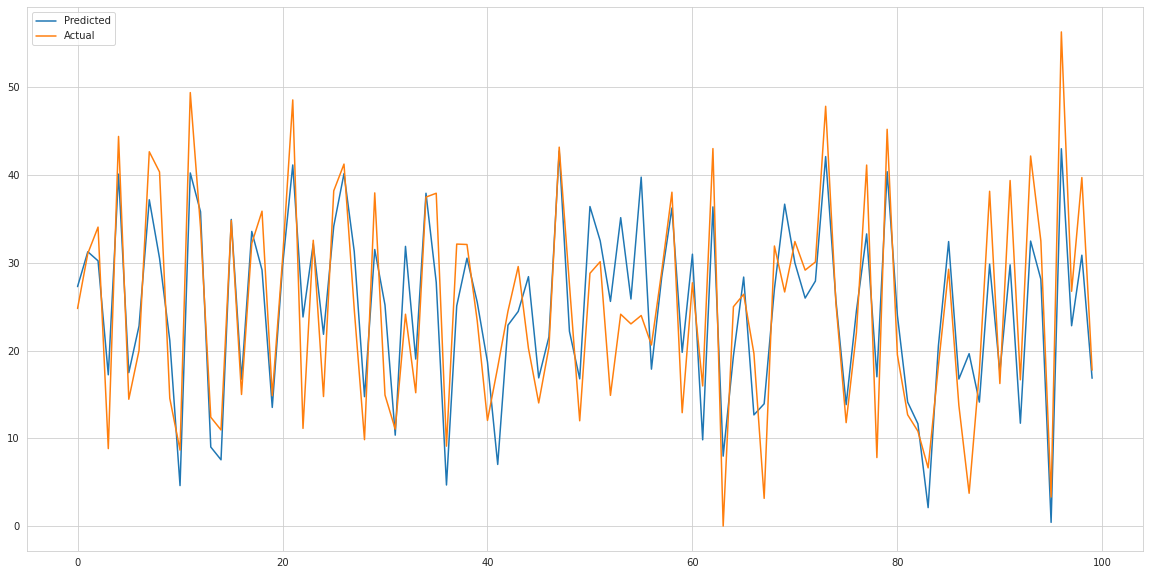

In [64]:
# Evaluation Graph
evaluation_graph(y_test,y_pred_lasso)

## *Ridge Regression*

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [74]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -37.71339867042349


In [75]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [76]:
# Evaluation 
score_metrics(y_test, y_pred_ridge)

MSE : 38.659856651707614
RMSE : 6.217705095266871
R2 : 0.7524810232978723
Adjusted R2 :  0.746220590163486


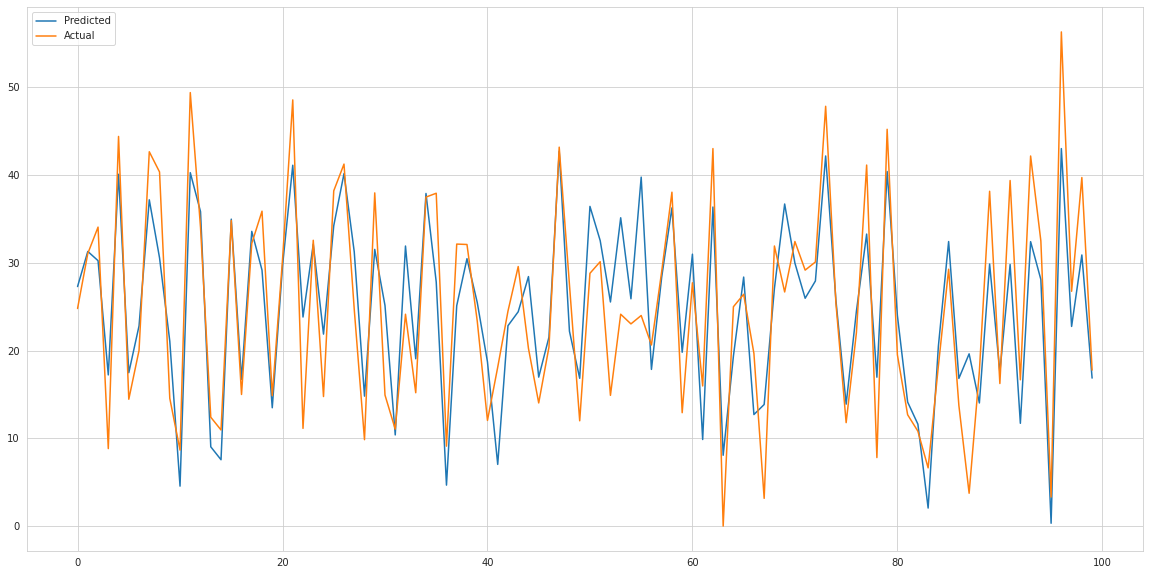

In [77]:
# Evaluation Graph
evaluation_graph(y_test,y_pred_ridge)

## *Elastic Net*

In [78]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [79]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [80]:
elasticnet.score(X_train, y_train)

0.6192817400719869

In [81]:
y_pred_en = elasticnet.predict(X_test)

In [82]:
# Evaluation 
score_metrics(y_test, y_pred_en)

MSE : 60.817923762417145
RMSE : 7.7985847281681275
R2 : 0.610614431645685
Adjusted R2 :  0.6007658036873089


In [83]:
y_pred_ridge

array([27.30009429, 31.29957105, 30.24941133, ..., 38.21932119,
       19.98502088, 16.13177589])

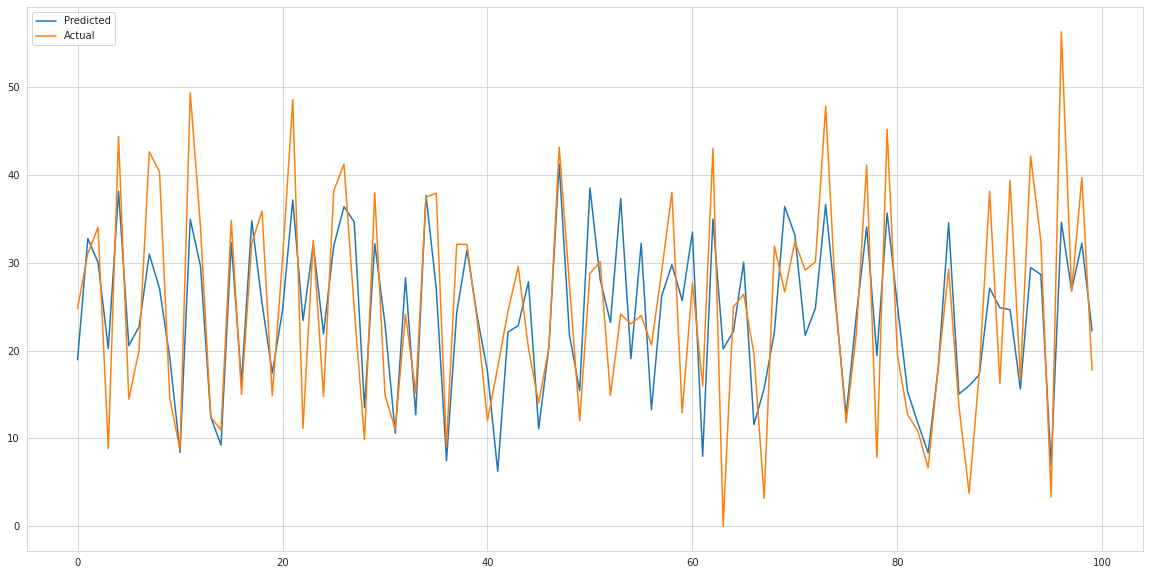

In [84]:
evaluation_graph(y_test,y_pred_en)

# Trying Tree Based Models

Creating function to get feature importance


In [67]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## **Decision Tree Regression**

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [68]:
y_pred_dt = dt.predict(X_test)

In [69]:
score_metrics(y_test, y_pred_dt)

MSE : 29.636828552596796
RMSE : 5.443971762656084
R2 : 0.8102507843698602
Adjusted R2 :  0.8054515067848356


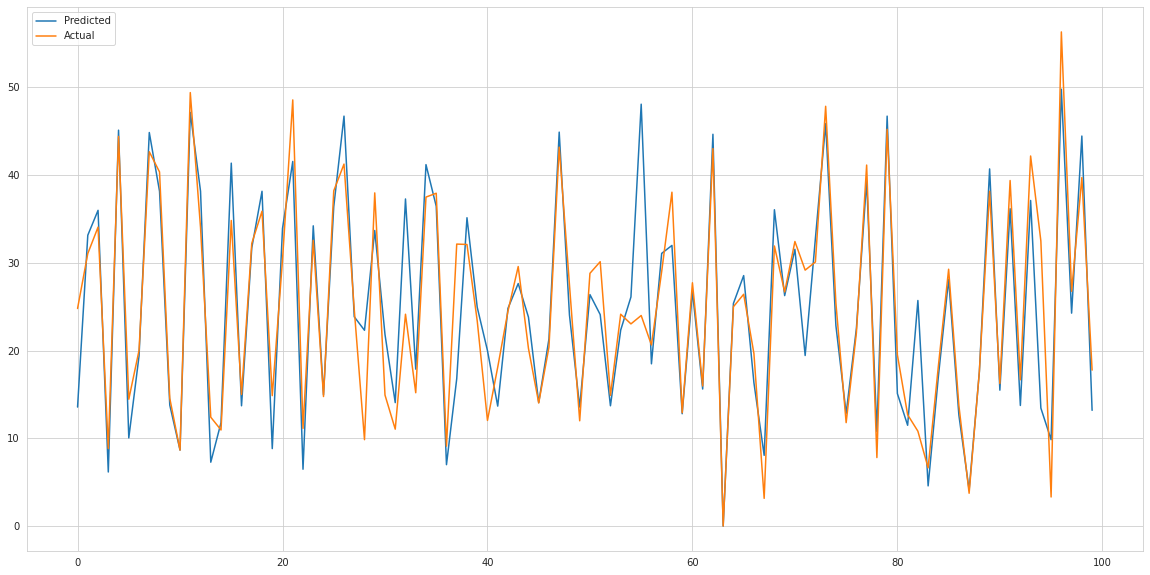

In [70]:
# Evaluation Graph
evaluation_graph(y_test,y_pred_dt)

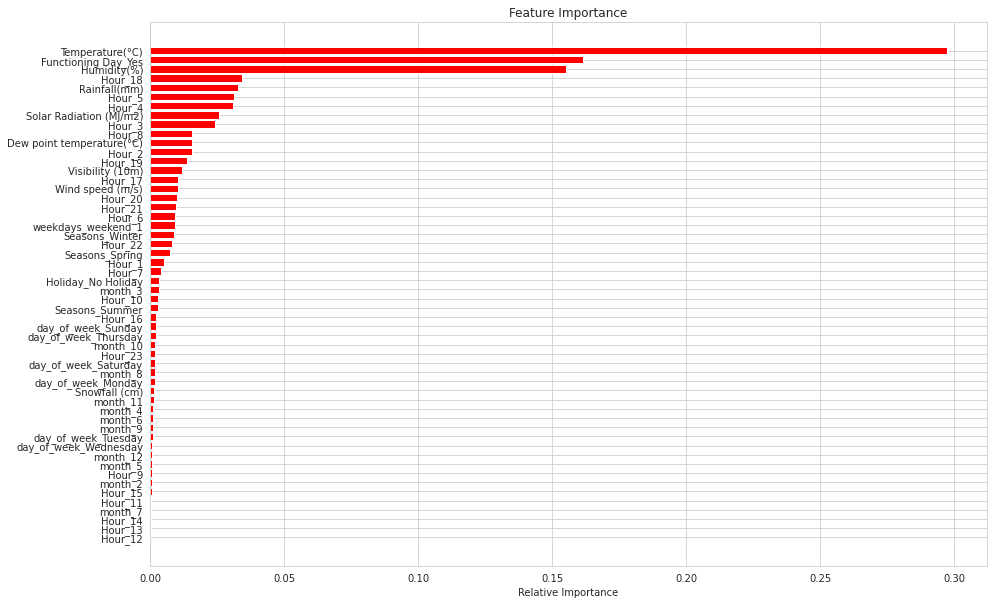

In [71]:
get_features_importance(dt,X_train)

## **Random Forest**

In [72]:
# Importing and fitting the model
from sklearn.ensemble import RandomForestRegressor
randomiser=RandomForestRegressor()
randomiser.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
# Predicting the Test set results
y_pred_rf = randomiser.predict(X_test)

In [86]:
score_metrics(y_test,y_pred_rf)

MSE : 15.990727059801081
RMSE : 3.998840714482271
R2 : 0.8976196824984822
Adjusted R2 :  0.8950302037420036


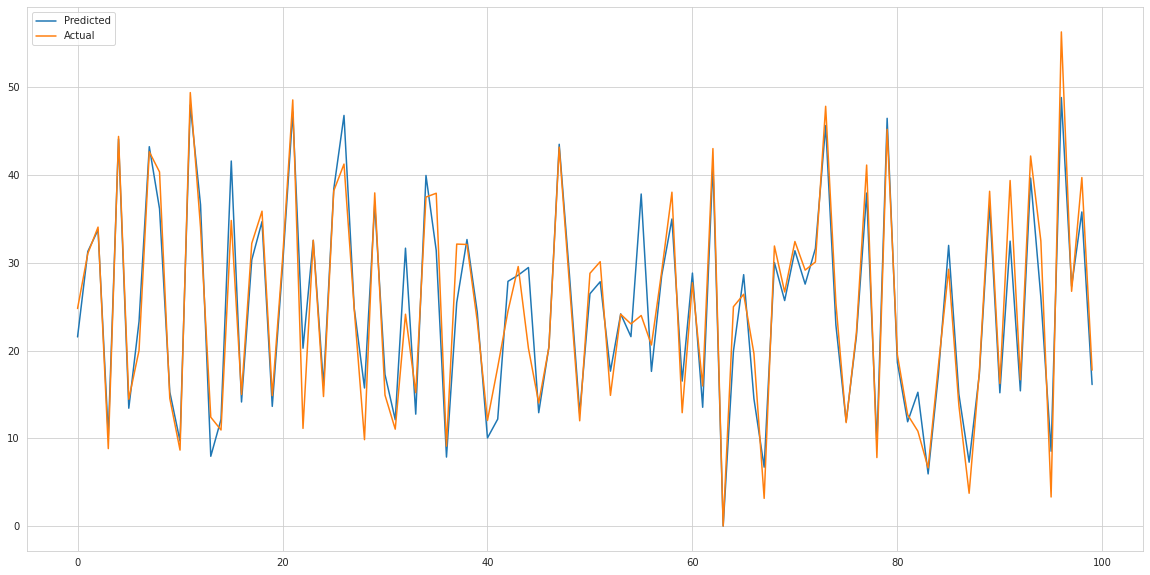

In [87]:
# Evaluation Graph
evaluation_graph(y_test,y_pred_rf)

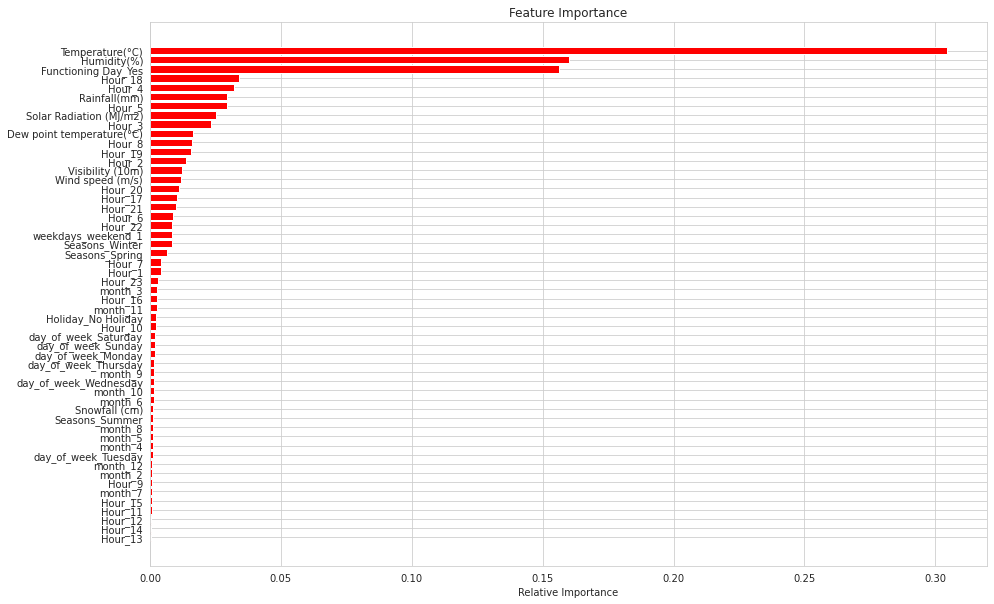

In [88]:
get_features_importance(randomiser,X_train)

## **XGB Regressor**

In [89]:
# Importing and fitting the model
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

[17:57:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [90]:
# Predicting the Test set results
y_pred_XGB = XGB.predict(X_test)

In [91]:
score_metrics(y_test,y_pred_XGB)

MSE : 24.398357781779094
RMSE : 4.939469382613794
R2 : 0.8437899911071809
Adjusted R2 :  0.8398390119595405


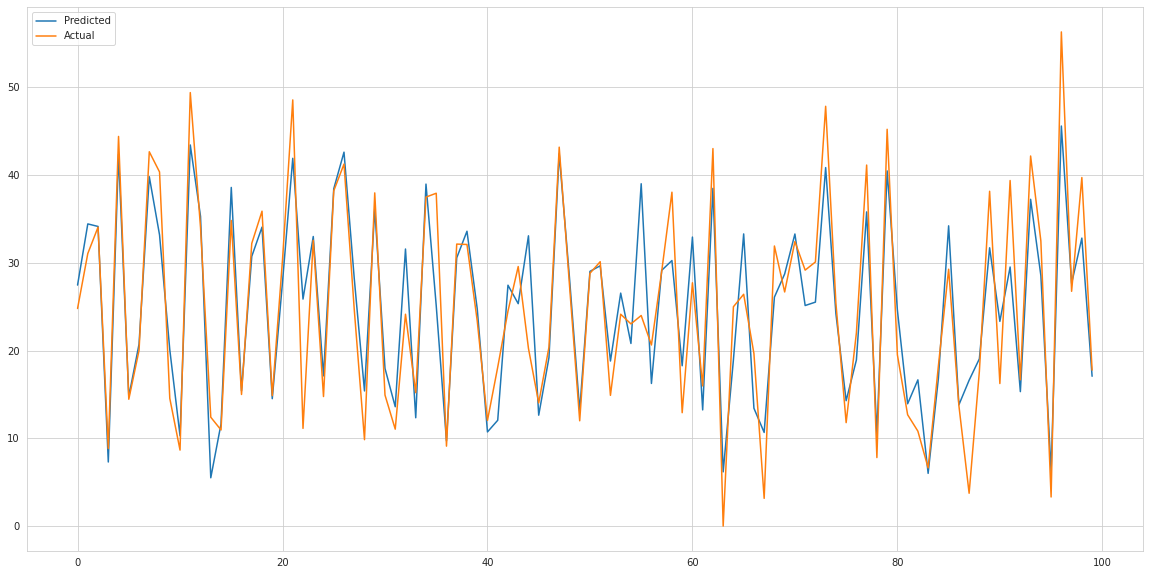

In [92]:
# Evaluation Graph
evaluation_graph(y_test,y_pred_XGB)

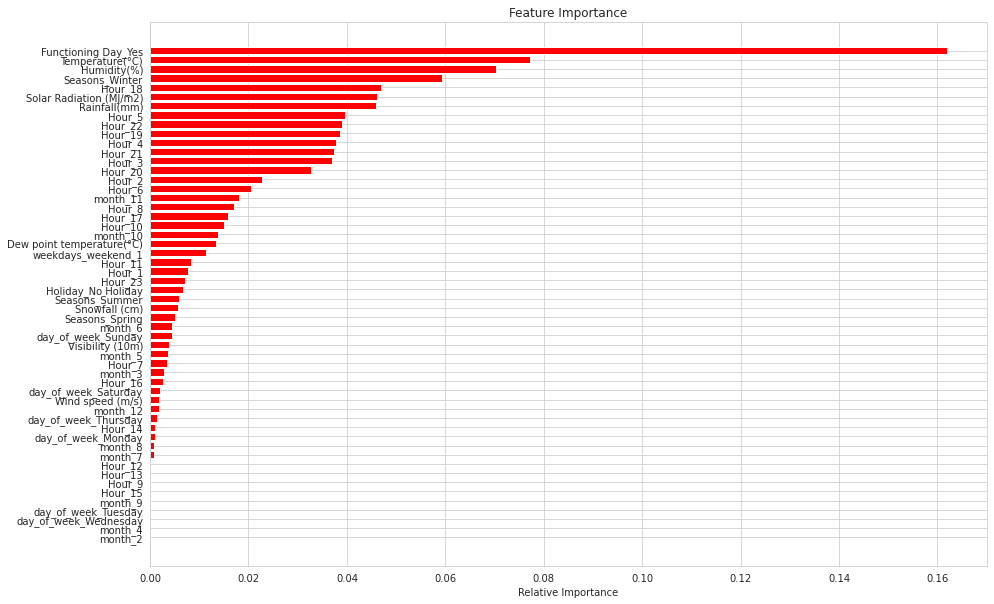

In [93]:
get_features_importance(XGB,X_train)

In [94]:
mean_sq_error

[38.67745375427077,
 38.66264890530538,
 29.636828552596796,
 38.659856651707614,
 60.817923762417145,
 15.990727059801081,
 24.398357781779094]

In [95]:
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [96]:
model_name=['Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Random_Forest','Xtreme_GB']

In [97]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [98]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Decision_Tree,Random_Forest,Xtreme_GB
Mean_square_error,38.677454,38.662649,29.636829,38.659857,60.817924,15.990727,24.398358
Root_Mean_square_error,6.219120,6.217930,5.443972,6.217705,7.798585,3.998841,4.939469
R2,0.752368,0.752463,0.810251,0.752481,0.610614,0.897620,0.843790
Adjusted_R2,0.746105,0.746202,0.805452,0.746221,0.600766,0.895030,0.839839


In [101]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [102]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,38.677454,6.219120,0.752368,0.746105
1,Lasso,38.662649,6.217930,0.752463,0.746202
2,Ridge,29.636829,5.443972,0.810251,0.805452
3,Elasticnet,38.659857,6.217705,0.752481,0.746221
4,Decision_Tree,60.817924,7.798585,0.610614,0.600766
5,Random_Forest,15.990727,3.998841,0.897620,0.895030
6,Xtreme_GB,24.398358,4.939469,0.843790,0.839839


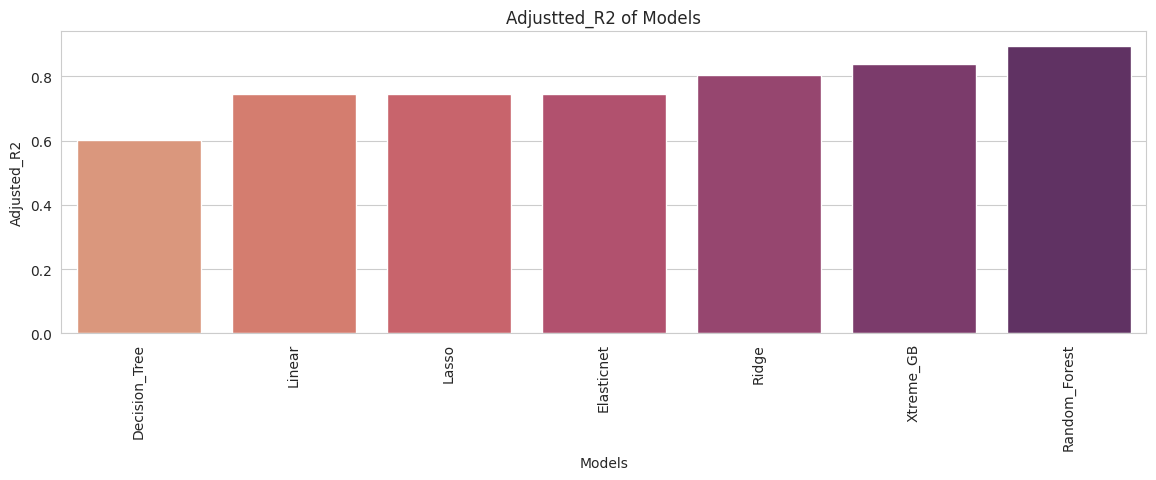

In [103]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);